In [1]:
%load_ext autoreload
%autoreload 2

In [26]:
import matplotlib.pyplot as plt
from compvis.preprocess.face_detect_single import face_detect_single
from compvis.preprocess.face_detection_multiple import face_detect_multiple
from compvis.preprocess.folder_dataset import folder_to_dataset_splits
from compvis.model.model import *

# Single image - For prediction purposes

In [41]:
import cv2

In [42]:
cropped_img_path, faces_coords, image = face_detect_single(cv2.imread('/home/kolapally/code/kolapally/computer_vision/data/original.png'),'png')

2/2 [==============================] - 1s 75ms/step
/home/kolapally/code/kolapally/computer_vision/compvis/interface/cropped/image_face0.png is saved
/home/kolapally/code/kolapally/computer_vision/compvis/interface/cropped/image_face1.png is saved
/home/kolapally/code/kolapally/computer_vision/compvis/interface/cropped/image_face2.png is saved
/home/kolapally/code/kolapally/computer_vision/compvis/interface/cropped/image_face3.png is saved
/home/kolapally/code/kolapally/computer_vision/compvis/interface/cropped/image_face4.png is saved
/home/kolapally/code/kolapally/computer_vision/compvis/interface/cropped/image_face5.png is saved


In [32]:
cropped_img_path

'/home/kolapally/code/kolapally/computer_vision/compvis/interface/cropped'

In [43]:
faces_coords


{0: (698, 52, 64, 84),
 1: (583, 128, 70, 93),
 2: (459, 56, 62, 87),
 3: (900, 53, 66, 91),
 4: (808, 115, 59, 85),
 5: (687, 250, 72, 101)}

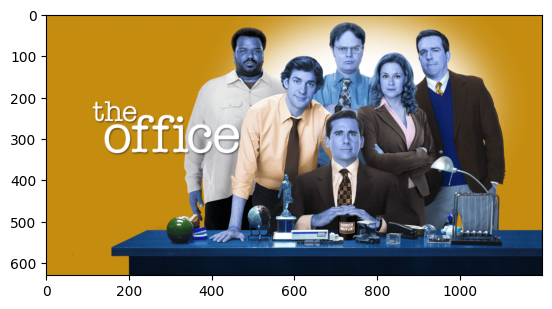

In [44]:
plt.imshow(image)

# Multiple files - To create Cropped dataset (needs to be checked, skip for now)

In [22]:
crop_path = face_detect_multiple('/home/daniel/code/dosorio79/code/kolapally/computer_vision/raw_data/Multiple_test', 'png')

1/1 [==============================] - 1s 611ms/step
/home/daniel/code/dosorio79/code/kolapally/computer_vision/raw_data/Multiple_test/Brian_Baumgartner/bb2_face0.png is saved


# Create Dataset

In [13]:
train_set, val_set, test_set, class_names = folder_to_dataset_splits('/home/daniel/code/dosorio79/code/kolapally/computer_vision/raw_data/cropped_clean')

NotFoundError: Could not find directory /home/daniel/code/dosorio79/code/kolapally/computer_vision/raw_data/cropped_clean

In [5]:
train_set.cardinality().numpy()

22

In [6]:
val_set.cardinality().numpy()

6

In [7]:
test_set.cardinality().numpy()

7

In [8]:
class_names

['Angela', 'Dwight', 'Jim', 'Kevin', 'Michael', 'Pam']

# Model instantiation and training

In [10]:
model = model_init((128,128,3))

✅model initialized
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet152 (Functional)      (None, 4, 4, 2048)        58370944  
                                                                 
 flatten (Flatten)           (None, 32768)             0         
                                                                 
 dense (Dense)               (None, 256)               8388864   
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 dense_1 (Dense)             (None, 130)               33410     
                                                                 
 dense_2 (Dense)             (None, 6)                 786       
                                                                 
Total params: 66,794,004
Trainable pa

In [11]:
model = model_compile(model)

✅ model compiled


In [12]:
model, history = model_train(model, train_set, val_set)

Epoch 1/100
22/22 [==============================] - 125s 5s/step - loss: 7.0951 - accuracy: 0.3111 - val_loss: 2.1472 - val_accuracy: 0.5030
Epoch 2/100
22/22 [==============================] - 82s 4s/step - loss: 1.7626 - accuracy: 0.5284 - val_loss: 0.6832 - val_accuracy: 0.7751
Epoch 3/100
22/22 [==============================] - 66s 3s/step - loss: 1.1021 - accuracy: 0.6449 - val_loss: 0.6106 - val_accuracy: 0.8166
Epoch 4/100
22/22 [==============================] - 66s 3s/step - loss: 0.9104 - accuracy: 0.7074 - val_loss: 0.4393 - val_accuracy: 0.8343
Epoch 5/100
22/22 [==============================] - 65s 3s/step - loss: 0.7771 - accuracy: 0.7116 - val_loss: 0.4945 - val_accuracy: 0.8402
Epoch 6/100
22/22 [==============================] - 65s 3s/step - loss: 0.6465 - accuracy: 0.7727 - val_loss: 0.2728 - val_accuracy: 0.9112
Epoch 7/100
22/22 [==============================] - 67s 3s/step - loss: 0.6996 - accuracy: 0.7642 - val_loss: 0.4290 - val_accuracy: 0.8402
Epoch 8/100


In [13]:
model_save(model, 'Resnet150-test1')

✅ Model saved locally


In [22]:
model_eval(model, test_set)

7/7 [==============================] - 16s 2s/step - loss: 0.7524 - accuracy: 0.7798
Model loss:0.7523916363716125, accuracy:0.7798165082931519


In [23]:
label, images = model_predict(model, '/home/daniel/code/dosorio79/code/kolapally/computer_vision/raw_data/cast/mix', class_names, target_size=(128,128))

1/1 [==============================] - 0s 200ms/step
✅ Prediction completed


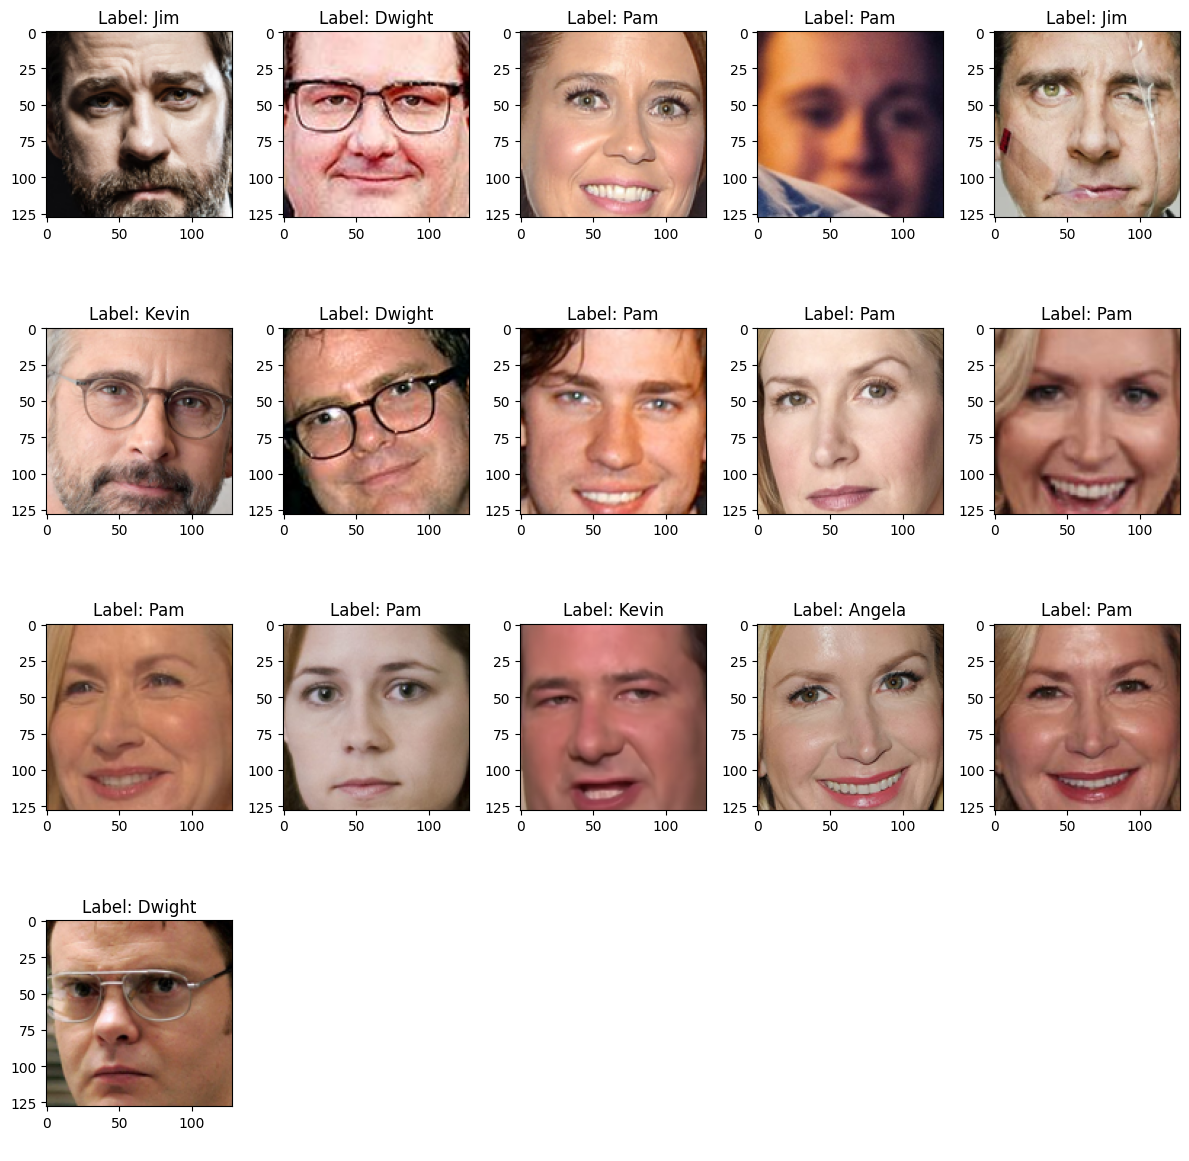

In [24]:
# Determine the number of rows and columns based on the number of images
num_rows = int(len(images) ** 0.5)
num_cols = int(len(images) ** 0.5) + 1

# Create the subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(12, 12))

# Flatten the axes so we can iterate over them as a 1D array
axes = axes.flatten()

# Iterate over the images and plot them in separate subplots
for idx, image in enumerate(images):
    # Plot the image in the current subplot
    axes[idx].imshow(image)
    axes[idx].set_title(f'Label: {label[idx]}')

# Hide any unused subplots
for i in range(len(images), num_rows*num_cols):
    axes[i].axis('off')

# Adjust the layout and display the figure
fig.tight_layout()
plt.show()

# Loading an external model from Kolapally

In [4]:
model = model_load('/home/kolapally/code/kolapally/computer_vision/compvis/model/models/model.h5')

✅ Model loaded from local disk


In [5]:
class_names = ['Angela','Dwight','Jim','Kevin','Michael','Pam']

In [45]:
label, images = model_predict(model,cropped_img_path , class_names, target_size=(128,128))

1/1 [==============================] - 0s 311ms/step
✅ Prediction completed


In [7]:
label

['Jim', 'Kevin', 'Kevin']

In [17]:
images

[<PIL.Image.Image image mode=RGB size=128x128>]

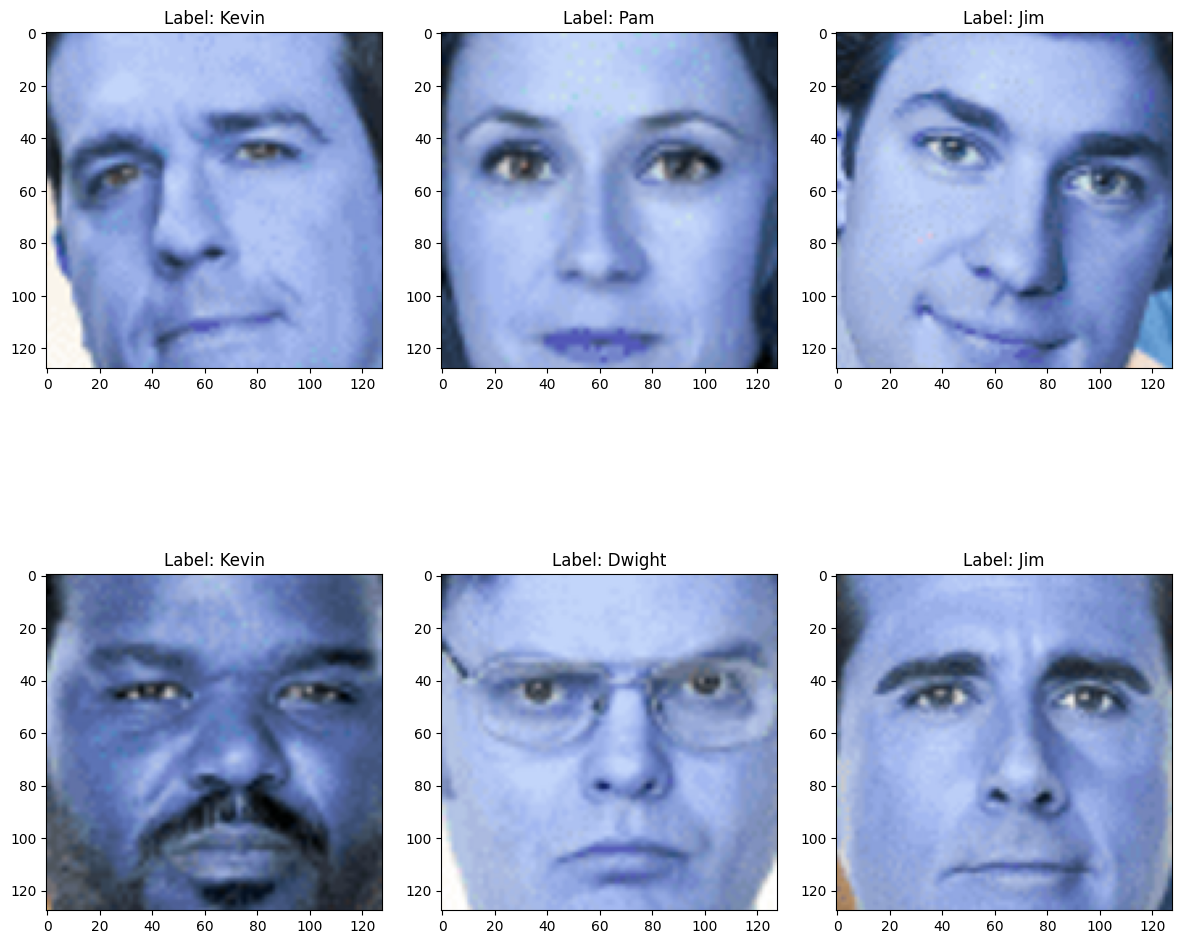

In [46]:
# Determine the number of rows and columns based on the number of images
num_rows = int(len(images) ** 0.5)
num_cols = int(len(images) ** 0.5) + 1

# Create the subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(12, 12))

# Flatten the axes so we can iterate over them as a 1D array
axes = axes.flatten()

# Iterate over the images and plot them in separate subplots
for idx, image in enumerate(images):
    # Plot the image in the current subplot
    axes[idx].imshow(image)
    axes[idx].set_title(f'Label: {label[idx]}')

# Hide any unused subplots
for i in range(len(images), num_rows*num_cols):
    axes[i].axis('off')

# Adjust the layout and display the figure
fig.tight_layout()
plt.show()

In [32]:
class_names

['Angela', 'Dwight', 'Jim', 'Kevin', 'Michael', 'Pam']

In [33]:
color_map = {
    "Angela": (0, 0, 255),
    "Dwight": (0, 0, 100),
    "Jim": (255, 0, 0),
    "Kevin": (0, 0, 150),
    "Michael": (200, 0, 0),
    "Pam": (0, 255, 0),
#     "other person": (200, 0, 0),
#     "trailer": (0, 150, 150),
#     "motorcycle": (0, 150, 0),
#     "bus": (0, 0, 100),
}

In [50]:
faces_coords

{0: (698, 52, 64, 84),
 1: (583, 128, 70, 93),
 2: (459, 56, 62, 87),
 3: (900, 53, 66, 91),
 4: (808, 115, 59, 85),
 5: (687, 250, 72, 101)}

In [51]:
label

['Kevin', 'Pam', 'Jim', 'Kevin', 'Dwight', 'Jim']

In [47]:
import cv2
def api_output(image,faces_coords,label):
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    font = cv2.FONT_HERSHEY_TRIPLEX
    for face,coords in faces_coords.items():
            x, y, w, h = coords
            # draw rectangle
            color = color_map[label[face]]
            stroke = 3
            cv2.rectangle(image, (x, y), (x + w, y + h), color, stroke)
            cv2.putText(image,label[face],(x-5, y-15),font,0.5,color=color)
    return image

In [48]:
image = api_output(image,faces_coords,label)
# cv2.imshow('Face detection', image)
# cv2.waitKey(0)
# cv2.destroyAllWindows()


error: OpenCV(4.7.0) :-1: error: (-5:Bad argument) in function 'cvtColor'
> Overload resolution failed:
>  - src is not a numpy array, neither a scalar
>  - Expected Ptr<cv::UMat> for argument 'src'


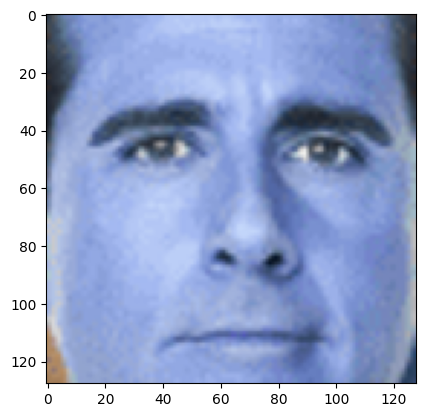

In [49]:
plt.imshow(image)